<a href="https://colab.research.google.com/github/iamBHK/DiabetesPrediction/blob/main/AI_Mid_Dense_1_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is build on Dense layer : Multi Layer Perceptron

Lets Import all the necessary Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.callbacks import TensorBoard
from keras import optimizers
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Loaded the Dataset here & Display header info

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv ('diabetes.csv',encoding='utf-8')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Lets Build relation b/w every variable from dataset & analyze

In [ ]:
X =df[['Pregnancies',	'Glucose'	,'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age',	'Outcome']]
dim=X.shape[1]

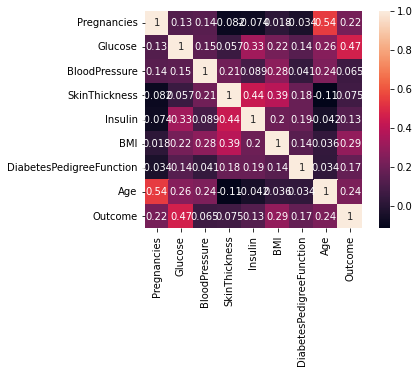

<Figure size 2016x2016 with 0 Axes>

In [ ]:
foo = sns.heatmap(X.corr(), vmax=1, square=True, annot=True)
plt.figure(figsize=(28,28))
X=X.to_numpy()
Y= df[['Outcome']] # 2D
Y=Y.to_numpy()
t1=Y.shape[0]
Y=np.reshape(Y,(t1,))  # 2D
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.02)

In [ ]:
y_train2=tf.keras.utils.to_categorical(y_train)
print(y_train2.shape)
category=2      
y_test2=tf.keras.utils.to_categorical(y_test, num_classes=(category))

(752, 2)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=90, activation=tf.nn.relu, input_dim=dim))
model.add(tf.keras.layers.Dense(units=100, activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(units=category, activation=tf.nn.softmax ))
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
history=model.fit(x_train, y_train2, epochs=170, batch_size=80)

Epoch 1/170
10/10 [==============================] - 0s 3ms/step - loss: 2.7261 - accuracy: 0.5585
Epoch 2/170
10/10 [==============================] - 0s 2ms/step - loss: 1.5279 - accuracy: 0.5585
Epoch 3/170
10/10 [==============================] - 0s 2ms/step - loss: 0.9694 - accuracy: 0.6383
Epoch 4/170
10/10 [==============================] - 0s 2ms/step - loss: 0.7480 - accuracy: 0.6263
Epoch 5/170
10/10 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.6423
Epoch 6/170
10/10 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6596
Epoch 7/170
10/10 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.6928
Epoch 8/170
10/10 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7194
Epoch 9/170
10/10 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7101
Epoch 10/170
10/10 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7367
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 90)                900       
                                                                 
 dense_7 (Dense)             (None, 100)               9100      
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,202
Trainable params: 10,202
Non-trainable params: 0
_________________________________________________________________


Lets evaluate algorithm by using this loss & accuracy graphical values

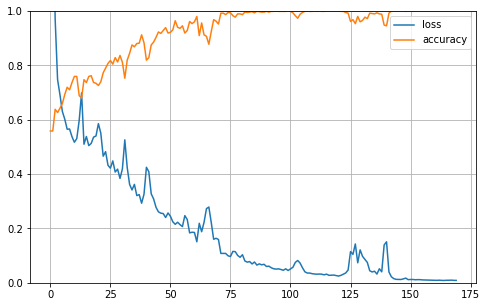

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test2 )
print("score:",score)

1/1 [==============================] - 0s 118ms/step - loss: 0.0105 - accuracy: 1.0000
score: [0.01054710615426302, 1.0]


In [ ]:
predict2 = model.predict(x_test)
print("predict_classes:",predict2)
print("y_test",y_test[:])

predict_classes: [[1.63351919e-03 9.98366535e-01]
 [1.93468593e-02 9.80653167e-01]
 [9.89381075e-01 1.06189428e-02]
 [1.75090320e-02 9.82490957e-01]
 [9.97470498e-01 2.52946722e-03]
 [6.73243683e-03 9.93267536e-01]
 [5.60063263e-03 9.94399369e-01]
 [9.98995125e-01 1.00488344e-03]
 [4.85084165e-04 9.99514937e-01]
 [7.08751380e-03 9.92912471e-01]
 [9.64546204e-01 3.54537964e-02]
 [9.89110112e-01 1.08899325e-02]
 [9.86031294e-01 1.39687555e-02]
 [9.95455861e-01 4.54408769e-03]
 [9.97989297e-01 2.01076036e-03]
 [9.72336531e-01 2.76634116e-02]]
y_test [1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0]


In [ ]:
# Serialize weights to HDF5
model.save_weights("UCMmodel.h5")
print ("Saved model")

Saved model
